# Analyzing Text

Write the TextAnalyzer class in the cell below. We have already imported some libraries that should be useful to you.

In [2]:
import requests, re
from bs4 import BeautifulSoup
from collections import Counter
import statistics as stats
import string
import urllib.request
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#create your class here
class TextAnalyzer:
    #initialize a text analyzer to manipulate with the following methods/properties
    #based on where the information is held (url, path, text)
    def __init__(self, src, src_type=""):
        if src[0:4] == 'http':
            self._src_type = 'url'
            req = requests.get(src)
            soup = BeautifulSoup(req.content, "html.parser")
            self._content = str(soup)
        elif src[len(src)-4:len(src)] == '.txt':
            self._src_type = 'path'
            file = open(src, "r")
            self._content = str(file.read())
            file.close()
        else :
            self._src_type = 'text'
            self._content = src
        self._orig_content = src
            
    #methods
    
    #get the contents of a specific tag within a url path
    #throws exception if tag/tagID does not exist
    def set_content_to_tag(self, tag, tag_id=None):
        req = requests.get(self._orig_content)
        soup = BeautifulSoup(req.content, "html.parser")
        try :
            self._content = (soup.find(tag, {"id": tag_id})).getText()
        except AttributeError :
            print('Tag or Tag ID could not be found')
            
    #resets the ._contents object to its original value at creation
    def reset_content(self):
        if self._src_type == 'url' :
            req = requests.get(self._orig_content)
            soup = BeautifulSoup(req.content, "html.parser")
            self._content = str(soup)
        elif self._src_type == 'path' :
            req = requests.get(self._orig_content)
            soup = BeautifulSoup(req.content, "html.parser")
            self._content = str(soup)
        else :
            self._content = self._orig_content
    
    #returns a list of words within ._contents with spaces and special characters stripped
    #all words in list will be capital if casesensitive is False, original otherwise
    def _words(self, casesensitive=False):
        strings_list = []
        curr_string = ''
        reg_ex = '[_\w\d]+'
        i = 0
        (self._content).strip(string.whitespace + string.punctuation)
        if not casesensitive :
            for l in self._content :
                if l == ' ' or l == '\n' or i == len(self._content)-1:
                    curr_string = curr_string.replace("'", "")
                    strings_list.append((curr_string.replace(reg_ex, '').strip(string.whitespace + string.punctuation)))
                    curr_string = ''
                else :
                    curr_string += l.upper()
                i = i + 1
        else :
            for j in self._content :
                if j == ' ' or j == '\n' or i == len(self._content)-1:
                    curr_string = curr_string.replace("'", "")
                    strings_list.append((curr_string.replace(reg_ex, '').strip(string.whitespace + string.punctuation)))
                    curr_string = ''
                else :
                    curr_string += j
                i = i + 1
        return strings_list
     
    #return a list of tuples where the key is the word, and the value is the number of times it appears
    #within the count, and the word must be in between the min and max length
    def common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        content_words = self._words(casesensitive)
        words = []
        for i in content_words :
            curr_size = len(i)
            if (minlen <= curr_size) and (curr_size <= maxlen) :
                if len(words) > 0 :
                    if i in dict(words).keys():
                        curr_val = dict(words).get(i)
                        index = words.index((i, curr_val))
                        words[index] = ((i, curr_val + 1))
                    else :
                        words.append((i,1))
                else :
                    words.append((i,1))
        words.sort(key=lambda x: x[1], reverse=True)
        return words[0:count]
            
    #return a list of tuples where the key is the character, and the value is the number of times it appears
    #the letters may be casesensitive or the characters may only contain letters
    def char_distribution(self, casesensitive=False, letters_only=False):
        content_words = self._words(casesensitive)
        chars = []
        for i in content_words :
            for l in i :
                if letters_only and (l.isalpha()):
                    if len(chars) > 0 :
                        if l in dict(chars).keys():
                            curr_val = dict(chars).get(l)
                            index = chars.index((l, curr_val))
                            chars[index] = (l, curr_val + 1)
                        else :
                            chars.append((l,1))
                    else :
                        chars.append((l,1))
                else :
                    if len(chars) > 0 :
                        if l in dict(chars).keys():
                            curr_val = dict(chars).get(l)
                            index = chars.index((l, curr_val))
                            chars[index] = (l, curr_val + 1)
                        else :
                            chars.append((l,1))
                    else :
                        chars.append((l,1))
        chars.sort(key=lambda x: x[1], reverse=True)
        return chars
        
    #display a graph based on the common words, x-axis = words, y-axis = number of times is appears
    #the bar graph is distributed in descending order
    def plot_common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        words = self.common_words(minlen, maxlen, count, casesensitive)
        keys , ys = zip(*words)
        xs = np.arange(len(keys))
        plt.figure(figsize=(len(keys),len(ys)))
        plt.bar(xs, ys, 0.5, align = "center", color = "blue")
        plt.xticks(xs, keys, rotation = 90)
        ax = plt.axes()
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
        plt.title('Common Words')
        plt.show()
        
    #display a graph based on the common words, x-axis = characters, y-axis = number of times is appears
    #the bar graph is distributed in descending order
    def plot_char_distribution(self, casesensitive=False, letters_only=False):
        letters = self.char_distribution(casesensitive, letters_only)
        keys , ys = zip(*letters)
        xs = np.arange(len(keys))
        plt.figure(figsize=(len(keys),len(ys)))
        plt.bar(xs, ys, 0.5, align = "center", color = "blue")
        plt.xticks(xs, keys, rotation = 90)
        ax = plt.axes()
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
        plt.title('Character Distrobution')
        plt.show()
    
    #properties
    
    #returns the average length of words within the entire ._contents
    #avg = (word_len_1 + ... + word_len_N) / total_words
    @property
    def avg_word_length(self):
        count_list = self._words()
        word_len = 0
        for i in count_list:
            word_len += len(i)
        avg_word_size = word_len / (self.word_count)
        return round(avg_word_size, 2)
    
    #the total number of words in ._contents
    @property
    def word_count(self):
        return len(self._words())
    
    #return the number of distinct words (individual types of words)
    @property
    def distinct_word_count(self):
        all_words = self._words()
        distinct_words = []
        for l in all_words:
            if l not in distinct_words:
                distinct_words.append(l) 
        return len(distinct_words)
    
    #return list of words from ._contents only as capital letters
    @property
    def words(self):
        return self._words(False)
    
    #calculate the value of words shared in ._content and text files positive and negative
    #using (tally/self.word_count * 1000) rounded up
    @property
    def positivity(self):
        tally = 0
        pa = TextAnalyzer("positive.txt")
        na = TextAnalyzer("negative.txt")
        for i in (pa._words()):
            if i in self._words():
                tally = tally + 1
        for j in (na._words()):
            if j in self._words():
                tally = tally - 1
        return round( tally / self.word_count * 1000)

## Tests
When you have finished, you should run the tests below. If you get errors, you should do your very best to fix those errors before submitting the project.

If you submit your project while still getting errors, you should explain that in your project submission email. The very first thing we will do to grade your project is run it through these tests. If it fails any of the tests, and you have not indicated that you are aware of specific test failures, we will stop grading and ask you to resubmit.

In [3]:
import unittest

url = 'https://www.webucator.com/how-to/address-by-bill-clinton-1997.cfm'
path = 'pride-and-prejudice.txt'
text = '''The outlook wasn't brilliant for the Mudville Nine that day;
the score stood four to two, with but one inning more to play.
And then when Cooney died at first, and Barrows did the same,
a sickly silence fell upon the patrons of the game.'''

class TestTextAnalyzer(unittest.TestCase):
    def test_discover_url(self):
        ta = TextAnalyzer(url)
        self.assertEqual(ta._src_type, 'url')
    def test_discover_path(self):
        ta = TextAnalyzer(path)
        self.assertEqual(ta._src_type, 'path')
    def test_discover_text(self):
        ta = TextAnalyzer(text)
        self.assertEqual(ta._src_type, 'text')
    def test_set_content_to_tag(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        self.assertEqual(ta._content[0:25], '\n\nAddress by Bill Clinton')
    def test_reset_content(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        ta.reset_content()
        self.assertEqual(ta._content[0], '<')
    def test_common_words(self):
        ta = TextAnalyzer(path, src_type='path')
        common_words = ta.common_words(minlen=4, maxlen=10)
        liz = common_words[3]
        self.assertEqual(liz[0],'ELIZABETH')
    def test_avg_word_length(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.avg_word_length, 4.04)
    def test_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.word_count, 46)
    def test_distinct_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.distinct_word_count, 39)
    def test_char_distribution(self):
        ta = TextAnalyzer(text, src_type='text')
        char_dist = ta.char_distribution(letters_only=True)
        self.assertEqual(char_dist[1][1], 20)
    def test_positivity(self):
        ta = TextAnalyzer(text, src_type='text')
        positivity = ta.positivity
        self.assertEqual(positivity, -43)
        
suite = unittest.TestLoader().loadTestsFromTestCase(TestTextAnalyzer)
unittest.TextTestRunner().run(suite)

F.F...FF..F
FAIL: test_avg_word_length (__main__.TestTextAnalyzer)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-3-d8d728a44539>", line 36, in test_avg_word_length
    self.assertEqual(ta.avg_word_length, 4.04)
AssertionError: 4.13 != 4.04

FAIL: test_common_words (__main__.TestTextAnalyzer)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-3-d8d728a44539>", line 33, in test_common_words
    self.assertEqual(liz[0],'ELIZABETH')
AssertionError: 'THEY' != 'ELIZABETH'
- THEY
+ ELIZABETH


FAIL: test_distinct_word_count (__main__.TestTextAnalyzer)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-3-d8d728a44539>", line 42, in test_distinct_word_count
    self.assertEqual(ta.distinct_word_count, 39)
AssertionError: 38 != 39

FAIL: test_positivity (__main

<unittest.runner.TextTestResult run=11 errors=0 failures=5>

## Plots
You should also run the cell below to make sure your plot methods work. They should produce plots that look like the images found at:
* <a href="character-distribution.png" target="image_win">character-distribution.png</a>
* <a href="common-words.png" target="image_win">common-words.png</a>

/Users/christinaduran/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


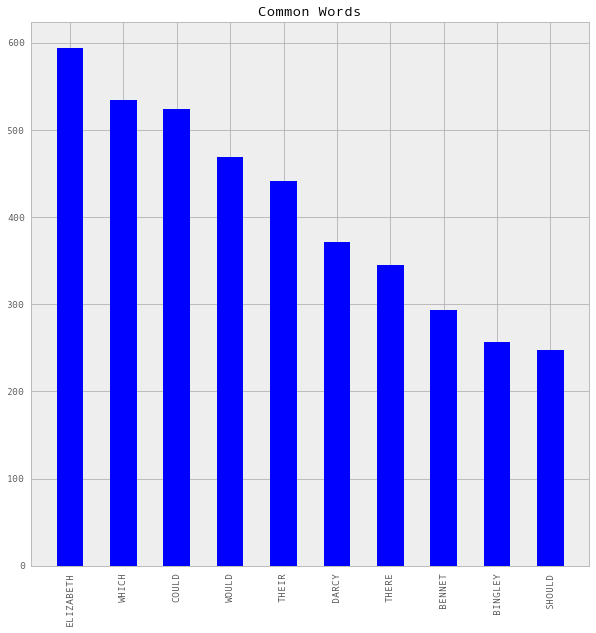

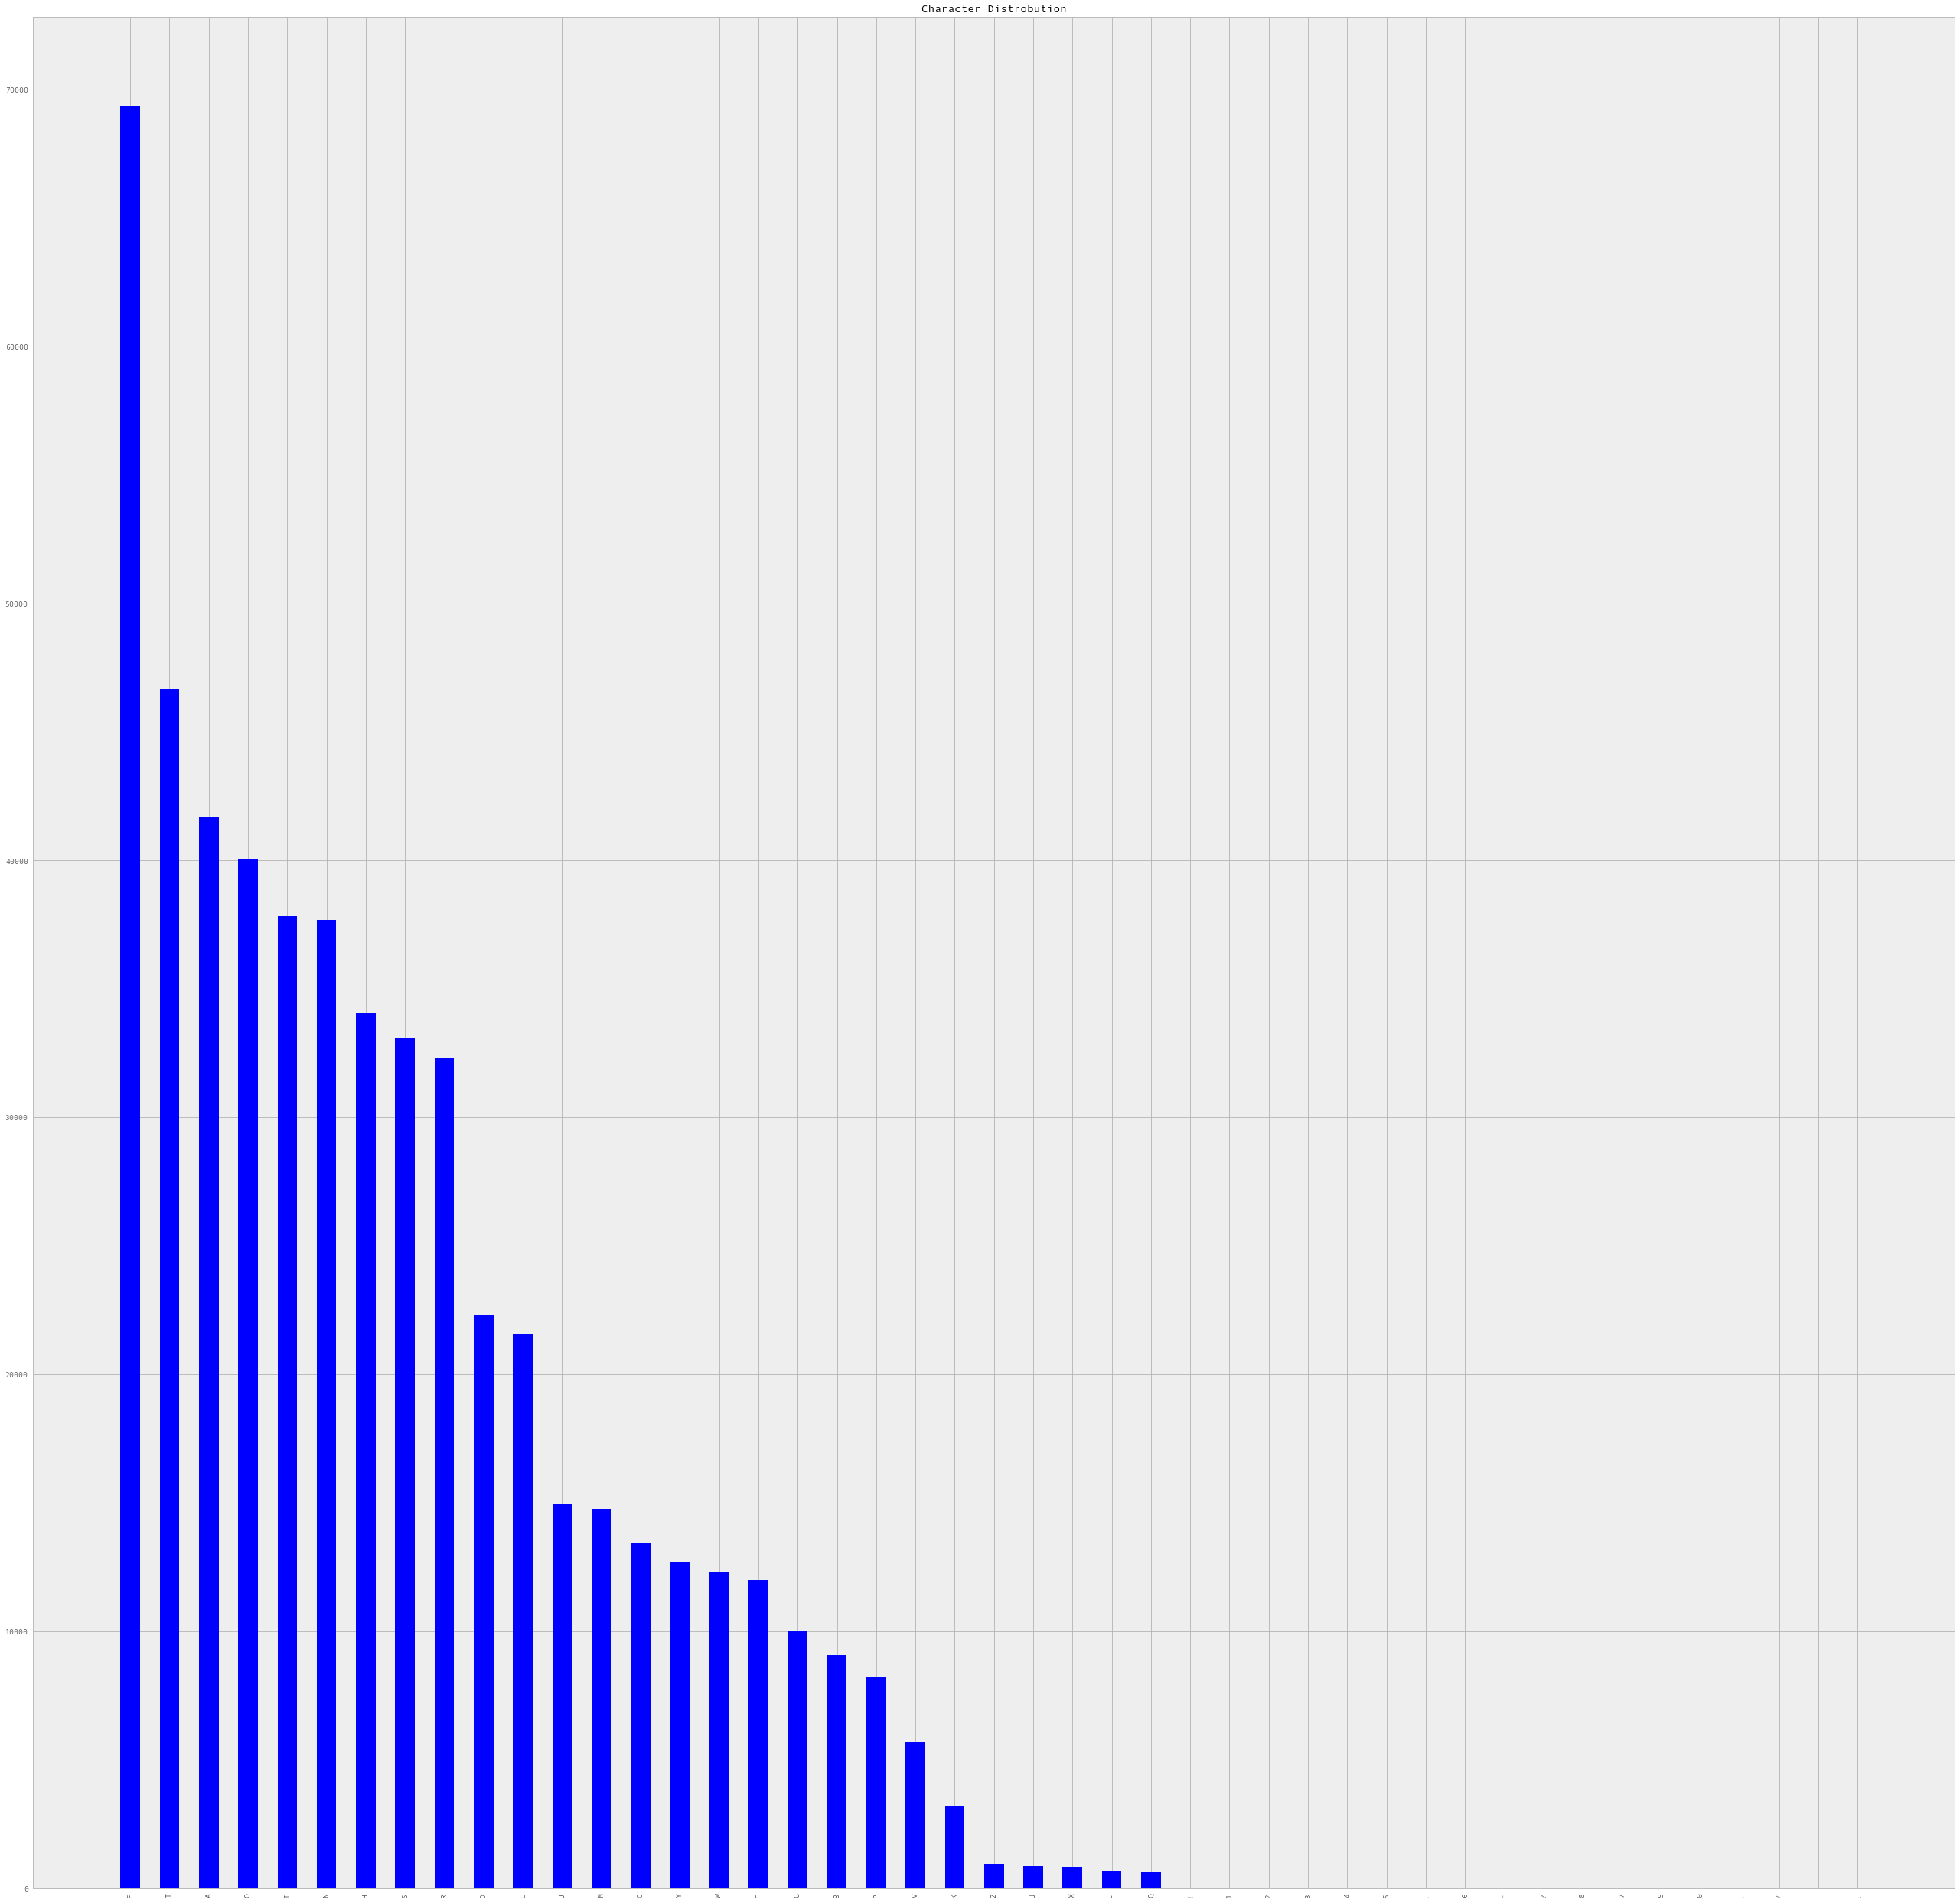

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
pd.options.display.mpl_style = 'default'

ta = TextAnalyzer('pride-and-prejudice.txt', src_type='path')
ta.plot_common_words(minlen=5)
ta.plot_char_distribution(letters_only=True)

## Exam: Using the TextAnalyzer

### Question 1
How many words are in the text of William Henry Harrison's 1841 inaugaral address?
* The address can be found at https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm.
* Its contents are in a div tag with the id 'content-main'.

In [81]:
#write code here
url = 'https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm'
ta = TextAnalyzer(url)
ta.set_content_to_tag('div','content-main')
print(ta.word_count)

8505


### Question 2
What is the least common letter in pride-and-prejudice.txt?

In [5]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt', src_type='path')
char_list = ta.char_distribution()
least_common = (char_list[0])[1]
least_common_char = (char_list[0])[0]
for i in char_list:
    if i[1] < least_common:
        least_common = i[1]
        least_common_char = i[0]
print(least_common_char)

:


### Question 3
What is the most common 11-letter word in pride-and-prejudice.txt?  

In [6]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt', src_type='path')
char_list = ta.common_words(minlen=11, maxlen=11, count = ta.word_count)
common_word_appearence = (char_list[0])[1]
common_word = (char_list[0])[0]
for i in char_list:
    if common_word_appearence < i[1]:
        common_word_appearence = i[1]
        common_word = i[0]
print(common_word)

NETHERFIELD


### Question 4
What is the average word length in pride-and-prejudice.txt?

In [24]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
print(ta.avg_word_length)

4.41


### Question 5
How many distinct words are there in pride-and-prejudice.txt?

In [3]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
print(ta.distinct_word_count)

6804


### Question 6
How many words, ignoring case, are used only once in pride-and-prejudice.txt?

In [7]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
words = ta.common_words(count = ta.word_count)
appear_once = []
for i in words:
    if i[1] == 1:
        appear_once.append(i[0])
print(len(appear_once))

2868


### Question 7
How many words pride-and-prejudice.txt have less than five characters, at least one of which is a capital 'A'.

In [8]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
words = ta.common_words(minlen=1, maxlen=4, count = ta.word_count, casesensitive = True)
a_words = []
for i in words:
    if 'A' in i:
        a_words.append(i)
print(len(a_words))

1


### Question 8
A palindrome is a word spelled the same forwards and backwards, like BOB. How many distinct palindromes are there in pride-and-prejudice.txt.
* Only include words with at least three letters.

In [9]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
words = ta.common_words(minlen=1, maxlen=3, count = ta.word_count, casesensitive = True)
palindromes = []
for i in words:
    if len(i) == 1:
        palindromes.append(i)
    elif len(i) == 3 and (i[0] == i[2]):
        palendromes.append(i)
print(len(palindromes))

0


### Question 9
What is the positivity rating of 'pride-and-prejudice.txt'

In [10]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
print(ta.positivity)

-2


### Question 10
Which of the following addresses has the lowest positivity rating?
1. https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm
1. https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm
1. https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm
1. https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm

In [9]:
#write code here
ta1 = TextAnalyzer('https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm')
print(ta1.positivity)
ta2 = TextAnalyzer('https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm')
print(ta2.positivity)
ta3 = TextAnalyzer('https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm')
print(ta3.positivity)
ta4 = TextAnalyzer('https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm')
print(ta4.positivity)

6
12
10
20
